# CHAPTER VIII

# Numerical Differentiation


Source [Course Home Page](https://hmanikantan.github.io/ECH60/)

In [16]:
import numpy as np

y=lambda t: t**3 # create function




<a id='taylor'></a>



### Taylor series expansions and truncation errors

Recall how Newton's method for root-finding was just a rearrangement of the leading terms of the Taylor series expansion. Similar ideas can be used to generate finite difference formulas.


Lets consider a function $f(x)$ and call the difference between consecutive points of the independent variable $h$: so $h=x_{i+1}-x_{i}$. For all formulas below, we will assume that the 'grid' is uniformly spaced, meaning all $x$ locations are at regular intervals. 

We can then write out the Taylor series expansion of the value of the function at an adjacent point $f(x_{i+1})$ around the current point $f(x_i)$ as:

$$  f(x_{i+1}) = f(x_i) + h f'(x_{i}) + \frac{h^2}{2!} f''(x_{i}) +  \frac{h^3}{3!} f'''(x_{i}) + \ldots $$


And we are interested in the derivative at the current point or $f'(x_{i})$. Dividing the above equation by $h$ and rearranging for the derivative gives:

$$  f'(x_{i}) = \frac{f(x_{i+1}) - f(x_i)}{h} - \frac{h}{2!} f''(x_{i}) -  \frac{h^2}{3!} f'''(x_{i}) + \ldots $$


This means that if our grid spacing or the distance $h$ between $x$ data points is small, the first term on the right-hand side is big relative to the following terms. Like we did previously in tutorial 5, we can ignore higher-order terms and write approximately:

$$  f'(x_{i}) = \frac{f(x_{i+1}) - f(x_i)}{h} + O(h) $$

The $O$ here stands for 'order of', meaning that the *truncation error* is 'of the order of $h$'. We do not know the exact value of the error but we can say that a smaller value of $h$ gives smaller error (like we saw with the sine example above)

This is indeed the forward difference formula for the first derivative. More formally, this is called the **two-point forward difference** to contrast it with other formulas we will derive below.

The backward difference can be similarly derived by writing the Taylor series expansion of the value of the function at an backward point $f(x_{i-1})$ around the current point $f(x_i)$. Here, $x_{i-1}=x_i-h$, giving:

$$  f(x_{i-1}) = f(x_i) - h f'(x_{i}) + \frac{h^2}{2!} f''(x_{i}) -  \frac{h^3}{3!} f'''(x_{i}) + \ldots $$

Rearranging for the derivative $f'(x_{i})$ like before gives the **two-point backward difference** :

$$  f'(x_{i}) = \frac{f(x_{i}) - f(x_{i-1})}{h} + O(h) $$


Deriving the **two-point central difference** formula requires a clever manipulation. For this, subtract the Taylor expansion for $f(x_{i-1})$ from the expansion for $f(x_{i+1})$ above to give:

$$  f(x_{i+1})-f(x_{i-1}) = 2 h f'(x_{i})  +  \frac{2 h^3}{3!} f'''(x_{i}) + \ldots $$

Dividing through by $2h$ and rearranging for the derivative $f'(x_{i})$ now gives:

$$  f'(x_{i}) = \frac{f(x_{i+1}) - f(x_{i-1})}{2 h} + O(h^2) $$

Note that the truncation error in the central difference is $O(h^2)$ or 'second-order', which implies a better accuracy than forward or backward difference. This is consistent with our observation with sample data sets above that central difference is more accurate. 

Another way to interpret truncation errors is as follows: reducing the grid size $h$ by half in a first-order method (one with error $O(h)$ like the forward or backward difference) reduces the error by half. Reducing $h$ ten times reduces error ten times, and so on. However, halving the grid size in a second-order method (one with error $O(h^2)$ like the central difference) reduces the truncation erros by a fourth! Reducing $h$ ten times in a central difference formula reduces the error a hundred fold! So, higher-order accuracy is always better as we can rapidly get much closer to the real derivative by reducing grid sizes much more efficiently. We saw this trend too with the examples above. When possible, we will therefore try to use at least $O(h^2)$ formulas.


We can use this information to write the following code that calculates the numerical derivative of a user-defined function $f(x)$ at a point $x=a$. This is achieved by generating neighboring points at $a+h$ and $a-h$ and using the central difference formula. Since the error is proportional to $h^2$ with central differences, it makes sense to choose a small number (and certainly we need $h<1$) :

In [1]:
# find derivative to second order truncation error using two-point central difference
# input user defined function f and a point a, returns df/dx at x=a

def func_deriv(f,a):
    
    # small number, smaller the better
    h=0.01
    
    # create neighboring data points at a+h and a-h
    f_front=f(a+h)
    f_back=f(a-h)
    
    dfdx=(f_front-f_back)/(2*h)
    
    return dfdx

Then, we can find the numerical value of the derivative of any continuous function at any point as follows:

In [4]:
# function definition
def f(x): return np.sin(x)

func_deriv(f,np.pi/4)

0.7070949961324513

Notice that `func_deriv` is written in a vectorized format. This means we can input a vector or a range of values for $a$ and get all derivative values simultaneously:

In [50]:
a_values=np.arange(0,np.pi+np.pi/8,np.pi/8)

func_deriv(f,a_values)

array([ 0.99998333,  0.92386413,  0.707095  ,  0.38267705,  0.        ,
       -0.38267705, -0.707095  , -0.92386413, -0.99998333])

Let's convince ourselves that the derivative is indeed correct and looks like a cosine by plotting it with a finer spacing: 

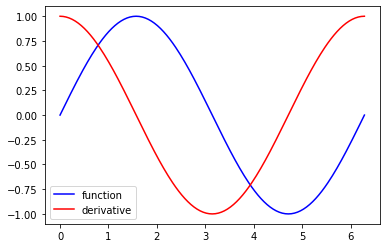

In [11]:
a_values=np.arange(0,2*np.pi+np.pi/100,np.pi/100)

# plot function (sine) at all a values
plt.plot(a_values,f(a_values),'b',label='function') 
# plot calculated derivative (must be cos if accurate) at all a values
plt.plot(a_values,func_deriv(f,a_values),'r',label='derivative')

plt.legend()
plt.show()

Try different functions $f(x)$ above. For example, try $y(x)=(x^2-x^3+5)/(x^3+1)$ or $y(x)=e^{-x^2/10}\cos(x)$. When the exact derivative can be found by hand, compare to ensure central differences give acccurate results. Remember that reducing the spacing $h$ reduces error by $h^2$. So we can get far more accurate by choosing smaller spacing between neighboring points.

<a id='end'></a>



### End corrections

Real measurements or simulated data often do not have an obvious functional form, so we cannot arbitrarily generate points. So we will have to make do with the provided values and grid spacing. An issue then are the end points: central differences would not work there, and we cannot use simple forward or backward differences because the truncation errors would not be consistent.

The Taylor series method provides a step-by-step routine to develop consistent end corrections. For example, while at the first data point, we can write a Taylor expansions for the second and third points as follows:

$$ f(x_{1}) = f(x_0) + h f'(x_{0}) + \frac{h^2}{2!} f''(x_{0}) +  \frac{h^3}{3!} f'''(x_{0}) + \ldots \\
f(x_{2}) = f(x_0) + 2h f'(x_{0}) + \frac{(2h)^2}{2!} f''(x_{0}) +  \frac{(2h)^3}{3!} f'''(x_{0}) + \ldots $$

Recall how we used a linear combination of two such expansions to get a central difference earlier. Similarly, if we wish to somehow combine these two to get an approximate formula with a truncation error of $O(h^2)$, we need the terms with the second derivatives to vanish. This can be achieved by multiplying the first equation by four and subtracting it from the second equation, to give:

$$ f(x_{2})-4f(x_{1}) = -3f(x_0) - 2h f'(x_{0})  + \frac{4h^3}{3!} f'''(x_{0}) + \ldots $$

Dividing through by $2h$ and rearranging to find $f'(x_{0})$ gives:

$$ f'(x_{0})  = \frac{-3f(x_0) + 4f(x_{1})  -f(x_{2})}{2h}  + O(h^2) $$

This is called the **three-point forward difference**, and it gives the derivative to second-order accuracy at the beginning of a data set. This is, indeed, the appropriate end correction for the first derivative if we use central differences everywhere else. 

For a data set containing $n$ entries, we can do the exact same thing for the derivative at the last point $f'(x_{n-1})$. Derive this by writing Taylor expansions for $f(x_{n-2})$ and $f(x_{n-3})$ in terms of $f(x_{n-1})$ and following similar steps as above. Try it. You should get the **three-point backward difference**:

$$ f'(x_{n-1})  = \frac{3f(x_{n-1}) -  4f(x_{n-2})  +f(x_{n-3})}{2h}  + O(h^2) $$

With these three-point formulas and the simple two-point central differences, we are now equipped to find the derivative of any 1D array to $O(h^2)$ accuracy so long as the independent variable is equally spaced. The following code is one way to do it:

In [12]:
# find derivative to second order truncation error
# three-point difference at end points
# two-point central difference everywhere else
# input y and equally spaced x vectors, returns dy/dx

def data_deriv(y,x):
    h=x[1]-x[0] # determine spacing
    dydx=np.zeros(y.shape) # initialize
    
    # first point
    dydx[0]=(-3*y[0]+4*y[1]-y[2])/(2*h)
    #last point
    dydx[-1]=(3*y[-1]-4*y[-2]+y[-3])/(2*h)
    # all other points, vectorized
    dydx[1:-1]=(y[2:]-y[:-2])/(2*h)
    
    return dydx

We can now use this to find the derivative of *any* data array corresponding to equal spacing in the independent variable! For example, the following array contains positions of a tracked particle between $t=2$ and $t=6$ seconds as $0.2$ second intervals:

In [13]:
x=np.array([ 7.87 , 6.23 , 4.55 , 2.89 , 1.33, -0.09, -1.31, -2.31,-3.06 , -3.55,
 -3.78 ,-3.77 ,-3.52 ,-3.08 ,-2.46 ,-1.72 ,-0.88 ,-0.   , 0.9  , 1.77 , 2.59])

t=np.arange(2,6.1,0.2)

We cannot use `func_deriv` because it's not clear what function passes through these data points. However, we can use `data_deriv` because all we need to provide are $x$ and $t$ data sets and it autoatically takes care of finding the appropriate spacing and correcting for end effects:

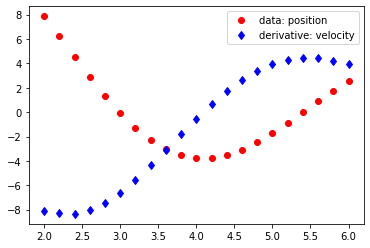

In [14]:
# find derivative of data set
dxdt=data_deriv(x,t)

# plot
plt.plot(t,x,'ro',label='data: position')
plt.plot(t,dxdt,'bd',label='derivative: velocity')

plt.legend()
plt.show()

Of course, the approximation gets better if the data has more 'resolution', in the sense that measurements are taken at more frequent intervals in $t$.

<a id='higher'></a>



### Higher derivatives and higher-order methods

The same Taylor series approach provides approximations for higher derivatives. The basic trick is to look for linear combinations of Taylor expansions for neighboring points so as to obtain the term we need. Recall how we subtracted the expansion for $f(x_{i-1})$ from the expansion for $f(x_{i+1})$ to get rid of the second derivative term and obtain the central difference formula. Instead, if we added the two expansions, we would get rid of the first derivative term and obtain:

$$ f(x_{i+1})+f(x_{i-1}) = 2 f(x_{i})  +  \frac{2 h^2}{2!} f''(x_{i}) +  \frac{2 h^4}{4!} f''''(x_{i}) +\ldots$$

Dividing through by $h^2$ and rearranging gives:

$$ f''(x_{i}) = \frac{f(x_{i+1})- 2 f(x_{i}) + f(x_{i-1})}{h^2}  + O(h^2)$$

This is the **second-order accurate three-point central difference formula for the second derivative**. 


Similar approaches can be used as before for the end corrections with consistent truncation error. For instance, multiplying the expansion for $f(x_1)$ by two and subtracting the result from the expansion for $f(x_2)$ gives (try this by hand):

$$  f''(x_{0}) = \frac{2f(x_0)  -5 f(x_{1}) + 4f(x_{2}) - f(x_3)}{h^2} + O(h^2)$$

And similarly for the point other end point at $i=n-1$ (derive this by hand too):

$$  f''(x_{n-1}) = \frac{2f(x_{n-1})  -5 f(x_{n-2}) + 4f(x_{n-3}) - f(x_{n-4})}{h^2} + O(h^2)$$

These latter two are the **second-order accurate three-point one-sided difference formulas for the second derivative**.

We can then write the following code exactly like before to evaluate second derivatives for a user-defined function $f(x)$:

In [50]:
# find second derivative to second order truncation error using three-point central difference
# input user defined function f and a point a, returns d2f/dx2 at x=a

def func_deriv2(f,a):
    
    # small number, smaller the better
    h=0.01
    
    # create neighboring and current data points at a+h,a, and a-h
    f_front=f(a+h)
    f_current=f(a)
    f_back=f(a-h)
    
    d2fdx2=(f_front-2*f_current+f_back)/(h**2)
    
    return d2fdx2

Let's check with a simple sine function:

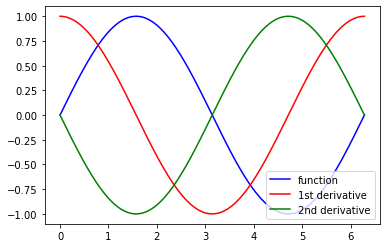

In [82]:
# function definition
def f(x): return np.sin(x)

a_values=np.arange(0,2*np.pi+np.pi/100,np.pi/100)

# plot function (sine) at all a values
plt.plot(a_values,f(a_values),'b',label='function') 

# plot derivative (must be cos if exact) at all a values
plt.plot(a_values,func_deriv(f,a_values),'r',label='1st derivative') 

# plot 2nd derivative (must be -sin if exact) at all a values
plt.plot(a_values,func_deriv2(f,a_values),'g',label='2nd derivative') 

plt.legend(loc='lower right')
plt.show()

Change the function above to make sure this works for any choice of user-defined function.

Similarly, we can evaluate second derivatives of finite data sets. When only a limited number of measurements are provided, we would use neighboring data points instead of generating arbitrary data, and we need to account for the end effect: 

In [16]:
# find second derivative to second order truncation error
# three-point one-sided difference at end points
# three-point central difference everywhere else
# input x and y vectors, returns d2y/dx2

def data_deriv2(y,x):
    h=x[1]-x[0]
    d2ydx2=np.zeros(y.shape) # initialize
    
    # first point
    d2ydx2[0]=(2*y[0]-5*y[1]+4*y[2]-y[3])/(h**2)
    #last point
    d2ydx2[-1]=(2*y[-1]-5*y[-2]+4*y[-3]-y[-4])/(h**2)
    # all other points, vectorized
    d2ydx2[1:-1]=(y[2:]-2*y[1:-1]+y[:-2])/(h**2)
    
    return d2ydx2

And let's check with the same data set as before:

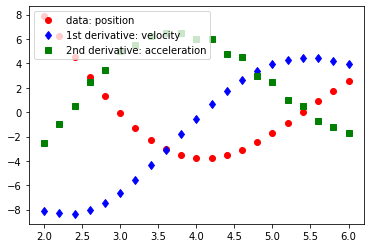

In [17]:
x=np.array([ 7.87 , 6.23 , 4.55 , 2.89 , 1.33, -0.09, -1.31, -2.31,-3.06 , -3.55,
 -3.78 ,-3.77 ,-3.52 ,-3.08 ,-2.46 ,-1.72 ,-0.88 ,-0.   , 0.9  , 1.77 , 2.59])

t=np.arange(2,6.1,0.2)

# find 1st derivative of data set
dxdt=data_deriv(x,t)
# find 2st derivative of data set
d2xdt2=data_deriv2(x,t)

# plot
plt.plot(t,x,'ro',label='data: position')
plt.plot(t,dxdt,'bd',label='1st derivative: velocity')
plt.plot(t,d2xdt2,'gs',label='2nd derivative: acceleration')

plt.legend(loc='upper left')
plt.show()

Third or fourth or higher derivatives can be determined in a similar manner, by linear combinations and substitutions of Taylor expansions with consistent truncation errors. These central differences turn out to be:

$$ f'''(x_{i}) = \frac{f(x_{i+2})- 2 f(x_{i+1}) + 2f(x_{i-1}) - f(x_{i-2})}{2h^2}  + O(h^2)$$

$$ f''''(x_{i}) = \frac{f(x_{i+2})- 4 f(x_{i+1})+6 f(x_{i}) - 4f(x_{i-1}) + f(x_{i-2})}{h^2}  + O(h^2)$$

Also, higher-order truncation error formulas can be obtained for all derivatives. For example, the first and second derivative to fourth-order accuracy are:

$$ f'(x_{i}) = \frac{-f(x_{i+2}) + 8 f(x_{i+1})- 8f(x_{i-1}) + f(x_{i-2})}{12 h}  + O(h^4)$$

$$ f''(x_{i}) = \frac{-f(x_{i+2}) + 16 f(x_{i+1}) -30 f(x_{i}) + 16f(x_{i-1}) -f(x_{i-2})}{12 h^2}  + O(h^4)$$

... and so on. Notice that higher derivatives or higher accuracy approximations need more information or data corresponding to more neighbors. Tables of these coefficients and corresponding end-corrections are readily available in textbooks (or [see here](https://en.wikipedia.org/wiki/Finite_difference_coefficient)). 
